Overview: Mental Health in Tech Clustering Project

This project is built on survey conducetd by Open Sourcing Mental Health (OSMI) to explore how various aspects about the respondents’ medical history and availability of care options from their workplace may motivate them to seek treatment for their mental health conditions.

This project utilizes survey results from 2019 to 2021. The dataset were downloaded from Kaggle:

*   https://www.kaggle.com/datasets/osmihelp/osmh-2021-mental-health-in-tech-survey-results
*   https://www.kaggle.com/datasets/osmihelp/osmi-2020-mental-health-in-tech-survey-
*   https://www.kaggle.com/datasets/osmihelp/osmi-mental-health-in-tech-survey-2019

K-means and K-modes clustering techniques are used to assign respondents into two clusters: 1) those that seek mental health treatment; 2) those that do not seek treatment.

The results of this investigation will provide valuable insights to employers on how they can better support employees that may be struggling with such conditions, motivating them to seek treatment and improve daily function.


1) Import Libraries and Data

In [1]:
#Import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Load system library
import sys
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Import 2021 file
url21='https://drive.google.com/file/d/1U7IVedfupNHYNwX865SMn0DlUQZLFi-s/view?usp=drive_link'
file_id21=url21.split('/')[-2]
dwn_url21='https://drive.google.com/uc?id=' + file_id21
df_21 = pd.read_csv(dwn_url21)

In [3]:
#Import 2020 file
url20='https://drive.google.com/file/d/1Zkqv-Cjin3RXg5eDsG1ySwJSLrDhdTug/view?usp=drive_link'
file_id20=url20.split('/')[-2]
dwn_url20='https://drive.google.com/uc?id=' + file_id20
df_20 = pd.read_csv(dwn_url20)

In [4]:
#Import 2019 file
url19='https://drive.google.com/file/d/1g0zHDHiH36rPJDfv2k9VhiAL8uurrd7m/view?usp=drive_link'
file_id19=url19.split('/')[-2]
dwn_url19='https://drive.google.com/uc?id=' + file_id19
df_19 = pd.read_csv(dwn_url19)

In [5]:
#Set options to be able to view all of the data
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

2) Data Cleaning

In [6]:
#Add new column for year
df_21['Year'] = '2021'
df_20['Year'] = '2020'
df_19['Year'] = '2019'

#Move Year to first column
#https://www.geeksforgeeks.org/how-to-move-a-column-to-first-position-in-pandas-dataframe/
first_21 = df_21.pop('Year')
df_21.insert(0, 'Year', first_21)

first_20 = df_20.pop('Year')
df_20.insert(0, 'Year', first_20)

first_19 = df_19.pop('Year')
df_19.insert(0, 'Year', first_19)

In [7]:
#Filter out columns of relevance for 2019:
df_19_filtered = df_19[
    ['Year',
 '*Are you self-employed?*',
 'How many employees does your company or organization have?',
 'Is your employer primarily a tech company/organization?',
 'Does your employer provide mental health benefits as part of healthcare coverage?',
 'Do you know the options for mental health care available under your employer-provided health coverage?',
 'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
 'Does your employer offer resources to learn more about mental health disorders and options for seeking help?',
 'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
 'If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?',
 'Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?',
 'Would you feel comfortable discussing a mental health issue with your coworkers?',
 'Do you *currently* have a mental health disorder?',
 'Have you had a mental health disorder in the past?',
 'Have you ever sought treatment for a mental health disorder from a mental health professional?',
 'Do you have a family history of mental illness?',
 'If you have a mental health disorder, how often do you feel that it interferes with your work *when* _*NOT*_* being treated effectively (i.e., when you are experiencing symptoms)?*',
 'Have you observed or experienced an *unsupportive or badly handled response* to a mental health issue in your current or previous workplace?',
 'What is your age?',
 'What is your gender?',
 'What country do you *work* in?']
]

In [8]:
#Filter out columns of relevance for 2020:
df_20_filtered = df_20[
    ['Year',
 '*Are you self-employed?*',
 'How many employees does your company or organization have?',
 'Is your employer primarily a tech company/organization?',
 'Does your employer provide mental health benefits as part of healthcare coverage?',
 'Do you know the options for mental health care available under your employer-provided health coverage?',
 'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
 'Does your employer offer resources to learn more about mental health disorders and options for seeking help?',
 'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
 'If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?',
 'Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?',
 'Would you feel comfortable discussing a mental health issue with your coworkers?',
 'Do you *currently* have a mental health disorder?',
 'Have you had a mental health disorder in the past?',
 'Have you ever sought treatment for a mental health disorder from a mental health professional?',
 'Do you have a family history of mental illness?',
 'If you have a mental health disorder, how often do you feel that it interferes with your work *when* _*NOT*_* being treated effectively (i.e., when you are experiencing symptoms)?*',
 'Have you observed or experienced an *unsupportive or badly handled response* to a mental health issue in your current or previous workplace?',
 'What is your age?',
 'What is your gender?',
 'What country do you *work* in?']
]

In [9]:
#Filter out columns of relevance for 2021:
df_21_filtered = df_21[
    ['Year',
 '*Are you self-employed?*',
 'How many employees does your company or organization have?',
 'Is your employer primarily a tech company/organization?',
 'Does your employer provide mental health benefits as part of healthcare coverage?',
 'Do you know the options for mental health care available under your employer-provided health coverage?',
 'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
 'Does your employer offer resources to learn more about mental health disorders and options for seeking help?',
 'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
 'If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?',
 'Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?',
 'Would you feel comfortable discussing a mental health issue with your coworkers?',
 'Do you *currently* have a mental health disorder?',
 'Have you had a mental health disorder in the past?',
 'Have you ever sought treatment for a mental health disorder from a mental health professional?',
 'Do you have a family history of mental illness?',
 'If you have a mental health disorder, how often do you feel that it interferes with your work *when* _*NOT*_* being treated effectively (i.e., when you are experiencing symptoms)?*',
 'Have you observed or experienced an *unsupportive or badly handled response* to a mental health issue in your current or previous workplace?',
 'What is your age?',
 'What is your gender?',
 'What country do you *work* in?']
]

In [10]:
#Change column names
df_19_filtered.columns = ['year','self_employed','no_employees','tech_company','work_benefits','work_benefits_awareness','work_communication','work_resources','anonymity','leave','supervisor_comfort','coworker_comfort','current_disorder','past_disorder','treatment','fam_history','work_interfere_not_treated','bad_response_work','age','gender','country']
df_20_filtered.columns = ['year','self_employed','no_employees','tech_company','work_benefits','work_benefits_awareness','work_communication','work_resources','anonymity','leave','supervisor_comfort','coworker_comfort','current_disorder','past_disorder','treatment','fam_history','work_interfere_not_treated','bad_response_work','age','gender','country']
df_21_filtered.columns = ['year','self_employed','no_employees','tech_company','work_benefits','work_benefits_awareness','work_communication','work_resources','anonymity','leave','supervisor_comfort','coworker_comfort','current_disorder','past_disorder','treatment','fam_history','work_interfere_not_treated','bad_response_work','age','gender','country']

In [11]:
#Filter out US and non self-employed only
df_19_US = df_19_filtered.loc[(df_19_filtered['country'] == 'United States of America') & (df_19_filtered['self_employed'] == False)]
df_20_US = df_20_filtered.loc[(df_20_filtered['country'] == 'United States of America') & (df_20_filtered['self_employed'] == 0)]
df_21_US = df_21_filtered.loc[(df_21_filtered['country'] == 'United States of America') & (df_21_filtered['self_employed'] == 0)]

In [12]:
#Drop country column
df_19_US.drop(columns=['country','self_employed'],inplace=True)
df_20_US.drop(columns=['country','self_employed'],inplace=True)
df_21_US.drop(columns=['country','self_employed'],inplace=True)

In [13]:
#Check filtered dataframe
df_19_US.info()
df_20_US.info()
df_21_US.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185 entries, 0 to 351
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   year                        185 non-null    object
 1   no_employees                185 non-null    object
 2   tech_company                185 non-null    object
 3   work_benefits               185 non-null    object
 4   work_benefits_awareness     179 non-null    object
 5   work_communication          185 non-null    object
 6   work_resources              185 non-null    object
 7   anonymity                   185 non-null    object
 8   leave                       185 non-null    object
 9   supervisor_comfort          185 non-null    object
 10  coworker_comfort            185 non-null    object
 11  current_disorder            185 non-null    object
 12  past_disorder               184 non-null    object
 13  treatment                   185 non-null    bool  

In [14]:
#Check data types for 2019 columns that differ from 2020 and 2021
df_19_US[['tech_company', 'treatment']].value_counts()

tech_company  treatment
True          True         92
False         True         41
True          False        34
False         False        18
dtype: int64

In [15]:
#Convert 2019 columns to same data types as 2020 & 2021
df_19_US['tech_company'] = df_19_US['tech_company'].replace({True : 1.0 , False : 0.0})
df_19_US['treatment'] = df_19_US['treatment'].replace({True : 1 , False : 0})

In [16]:
#Check data types for 2019 columns have been converted to conform with 2020 & 2021
df_19_US[['tech_company', 'treatment']].value_counts()

tech_company  treatment
1.0           1            92
0.0           1            41
1.0           0            34
0.0           0            18
dtype: int64

In [17]:
#Drop rows with missing values as there are only a few each year
df_19_drop = df_19_US.dropna()
df_20_drop = df_20_US.dropna()
df_21_drop = df_21_US.dropna()

In [18]:
#Combine all dataframes
df_all = pd.concat([df_19_drop, df_20_drop, df_21_drop], axis=0)
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 0 to 124
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   year                        276 non-null    object 
 1   no_employees                276 non-null    object 
 2   tech_company                276 non-null    float64
 3   work_benefits               276 non-null    object 
 4   work_benefits_awareness     276 non-null    object 
 5   work_communication          276 non-null    object 
 6   work_resources              276 non-null    object 
 7   anonymity                   276 non-null    object 
 8   leave                       276 non-null    object 
 9   supervisor_comfort          276 non-null    object 
 10  coworker_comfort            276 non-null    object 
 11  current_disorder            276 non-null    object 
 12  past_disorder               276 non-null    object 
 13  treatment                   276 non

3) Data Exporation and More Cleaning

Explore each variable one by one

['2019' '2020' '2021']
2019    177
2020     56
2021     43
Name: year, dtype: int64


<Axes: xlabel='count', ylabel='year'>

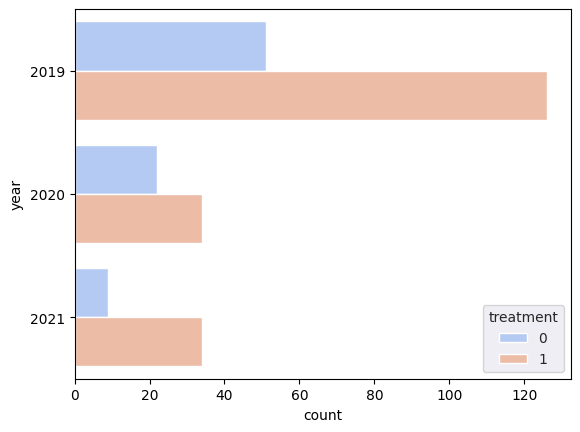

In [19]:
#year

print(df_all['year'].unique())
print(df_all['year'].value_counts())

f, ax = plt.subplots()
sns.set_style('darkgrid')
sns.countplot(y='year', hue='treatment',
              palette='coolwarm', data=df_all)

#In 2021, in the midst of covid, it seems relatively more employees sought out mental health treatment; however, number of responses in 2021 was low; more data is needed.

['26-100' '100-500' 'More than 1000' '500-1000' '6-25' '1-5']
More than 1000    118
100-500            57
26-100             47
6-25               26
500-1000           25
1-5                 3
Name: no_employees, dtype: int64


<Axes: xlabel='count', ylabel='no_employees'>

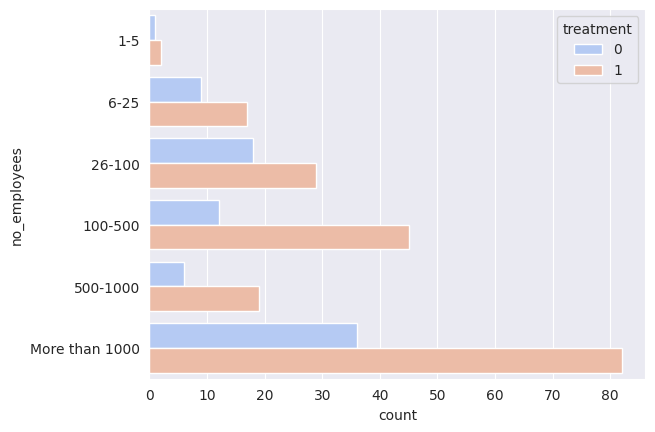

In [20]:
#no_employees
#1-5 --> 6-25 --> 26-100 --> 100-500 --> 500-1000 --> More than 1000

print(df_all['no_employees'].unique())
print(df_all['no_employees'].value_counts())

f, ax = plt.subplots()
sns.set_style('darkgrid')
sns.countplot(y='no_employees', hue='treatment', order=["1-5", "6-25", "26-100", "100-500", "500-1000", "More than 1000"],
              palette='coolwarm', data=df_all)

#The size of company may have an impact on whether employees seek mental health treatment.

[1. 0.]
1.0    184
0.0     92
Name: tech_company, dtype: int64


<Axes: xlabel='count', ylabel='tech_company'>

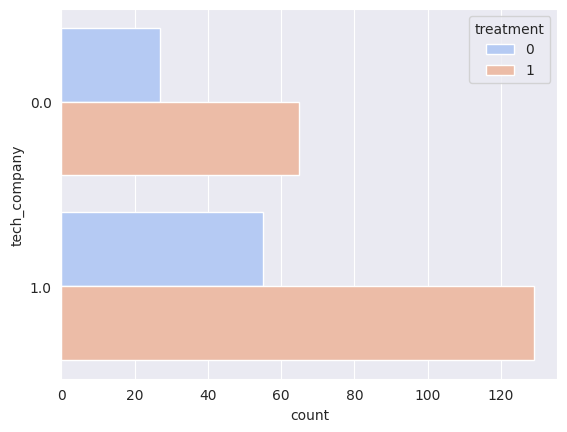

In [21]:
#tech_company

print(df_all['tech_company'].unique())
print(df_all['tech_company'].value_counts())

f, ax = plt.subplots()
sns.set_style('darkgrid')
sns.countplot(y='tech_company', hue='treatment',
              palette='coolwarm', data=df_all)

#Being in tech companies does not make employees seek mental health treatment more.

In [22]:
#work_benefits
print(df_all['work_benefits'].unique())
print(df_all['work_benefits'].value_counts())

["I don't know" 'Yes' 'No' 'Not eligible for coverage / NA']
Yes                               187
I don't know                       74
No                                 10
Not eligible for coverage / NA      5
Name: work_benefits, dtype: int64


In [23]:
#work_benefits: 'Not eligible for coverage / NA' is the same as 'No', convert these to a 'No' value.
df_all.loc[df_all['work_benefits']=='Not eligible for coverage / NA' , 'work_benefits'] = 'No'

<Axes: xlabel='count', ylabel='work_benefits'>

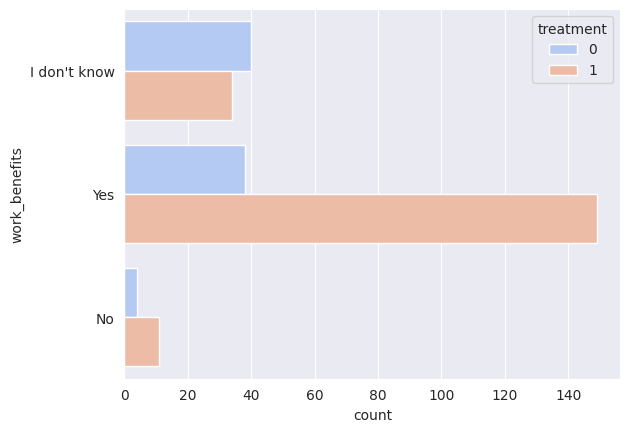

In [24]:
#work_benefits

f, ax = plt.subplots()
sns.set_style('darkgrid')
sns.countplot(y='work_benefits', hue='treatment',
              palette='coolwarm', data=df_all)

#Having mental health coverage in insurance motivates employees to seek mental health treatment more.

['No' 'Yes']
Yes    154
No     122
Name: work_benefits_awareness, dtype: int64


<Axes: xlabel='count', ylabel='work_benefits_awareness'>

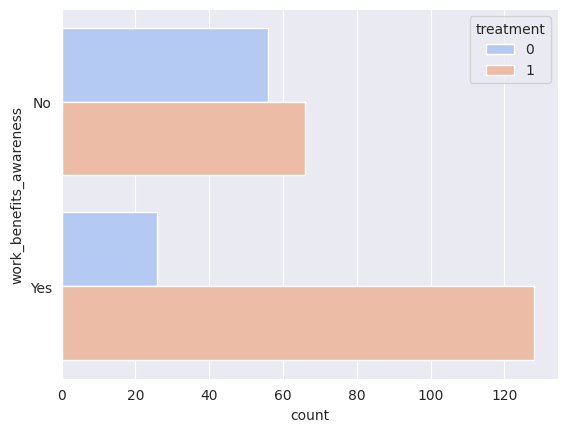

In [25]:
#work_benefits_awareness

print(df_all['work_benefits_awareness'].unique())
print(df_all['work_benefits_awareness'].value_counts())

f, ax = plt.subplots()
sns.set_style('darkgrid')
sns.countplot(y='work_benefits_awareness', hue='treatment',
              palette='coolwarm', data=df_all)

#Being aware of the options for mental health care available under employer-provided health coverage motivates employees to seek mental health treatment more.

['Yes' 'No' "I don't know"]
No              136
Yes             117
I don't know     23
Name: work_communication, dtype: int64


<Axes: xlabel='count', ylabel='work_communication'>

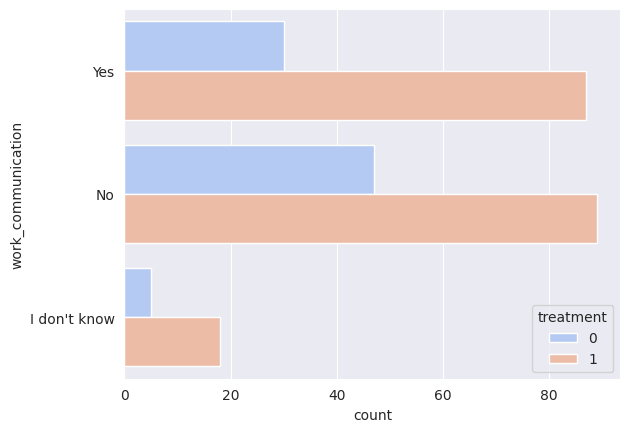

In [26]:
#work_communication

print(df_all['work_communication'].unique())
print(df_all['work_communication'].value_counts())

f, ax = plt.subplots()
sns.set_style('darkgrid')
sns.countplot(y='work_communication', hue='treatment',
              palette='coolwarm', data=df_all)

#If employers formally discussed mental health through wellness campaign or official communication, it motivates employees to seek mental health treatment more than not.

['Yes' "I don't know" 'No']
Yes             121
No               88
I don't know     67
Name: work_resources, dtype: int64


<Axes: xlabel='count', ylabel='work_resources'>

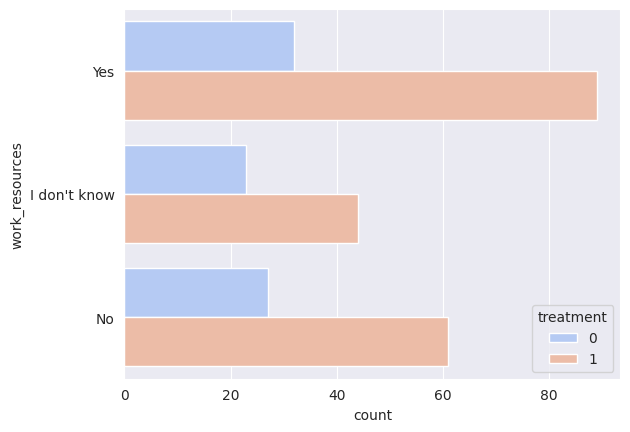

In [27]:
#work_resources

print(df_all['work_resources'].unique())
print(df_all['work_resources'].value_counts())

f, ax = plt.subplots()
sns.set_style('darkgrid')
sns.countplot(y='work_resources', hue='treatment',
              palette='coolwarm', data=df_all)

#If employer offer resources to learn more about mental health disorders and options for seeking help, it motivates employees to seek mental health treatment more than not.

["I don't know" 'Yes' 'No']
I don't know    163
Yes             108
No                5
Name: anonymity, dtype: int64


<Axes: xlabel='count', ylabel='anonymity'>

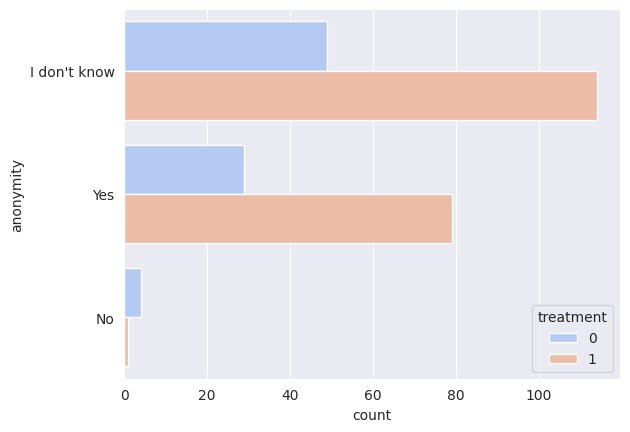

In [28]:
#anonymity

print(df_all['anonymity'].unique())
print(df_all['anonymity'].value_counts())

f, ax = plt.subplots()
sns.set_style('darkgrid')
sns.countplot(y='anonymity', hue='treatment',
              palette='coolwarm', data=df_all)

#Anonymity does not seem to motivate employees to seek mental health treatment more than not.

['Very easy' "I don't know" 'Somewhat difficult' 'Somewhat easy'
 'Neither easy nor difficult' 'Difficult']
Somewhat easy                 72
Very easy                     60
I don't know                  48
Somewhat difficult            41
Neither easy nor difficult    29
Difficult                     26
Name: leave, dtype: int64


<Axes: xlabel='count', ylabel='leave'>

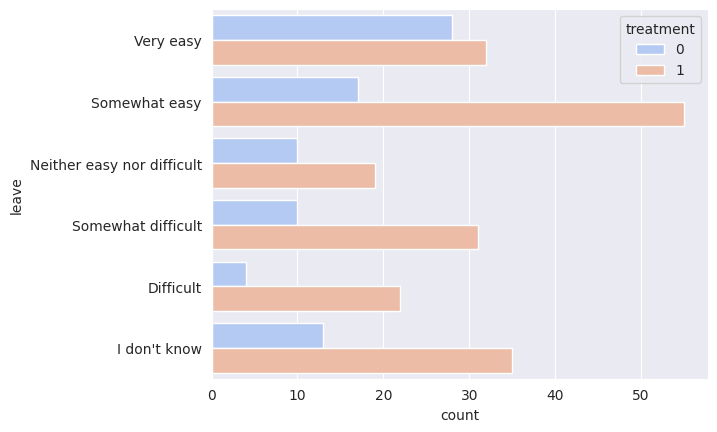

In [29]:
#leave

print(df_all['leave'].unique())
print(df_all['leave'].value_counts())

f, ax = plt.subplots()
sns.set_style('darkgrid')
sns.countplot(y='leave', hue='treatment', order = ['Very easy','Somewhat easy', 'Neither easy nor difficult','Somewhat difficult',
       'Difficult', "I don't know" ],
              palette='coolwarm', data=df_all)

#Ease of asking for leaving motivates employees to seek mental health treatment more than not.

['Yes' 'Maybe' 'No']
Yes      101
Maybe     96
No        79
Name: supervisor_comfort, dtype: int64


<Axes: xlabel='count', ylabel='supervisor_comfort'>

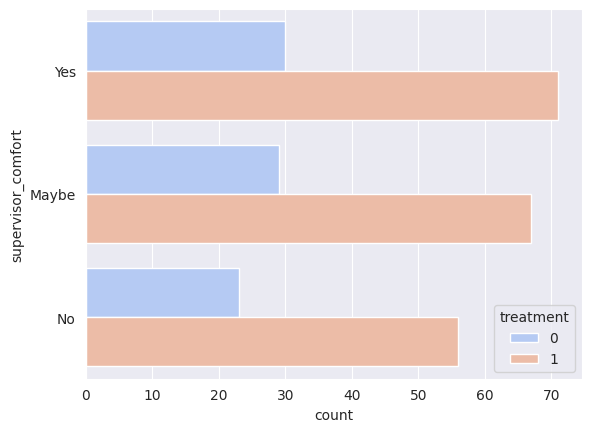

In [30]:
#supervisor_comfort

print(df_all['supervisor_comfort'].unique())
print(df_all['supervisor_comfort'].value_counts())

f, ax = plt.subplots()
sns.set_style('darkgrid')
sns.countplot(y='supervisor_comfort', hue='treatment',
              palette='coolwarm', data=df_all)

#If employees feel comfortable talking to supervisor about mental health issues, it seems to motivate them slightly more to seek mental health treatment.

['Yes' 'Maybe' 'No']
Maybe    124
No        77
Yes       75
Name: coworker_comfort, dtype: int64


<Axes: xlabel='count', ylabel='coworker_comfort'>

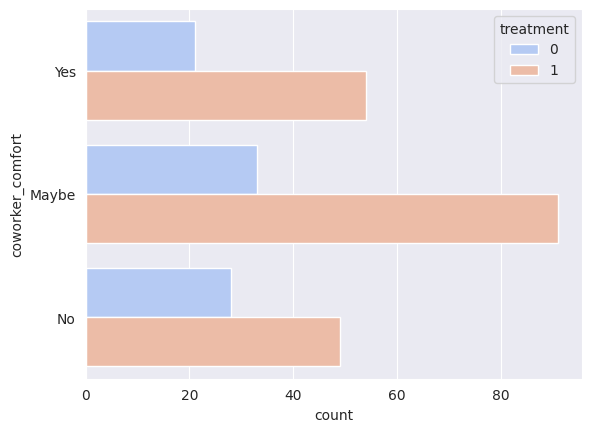

In [31]:
#coworker_comfort

print(df_all['coworker_comfort'].unique())
print(df_all['coworker_comfort'].value_counts())

f, ax = plt.subplots()
sns.set_style('darkgrid')
sns.countplot(y='coworker_comfort', hue='treatment',
              palette='coolwarm', data=df_all)

#If employees feel comfortable talking to coworkers about mental health issues, it does not seem to motivate them slightly more to seek mental health treatment.

In [32]:
#current_disorder

print(df_all['current_disorder'].unique())
print(df_all['current_disorder'].value_counts())

["Don't Know" 'Possibly' 'No' 'Yes']
Yes           139
No             65
Possibly       59
Don't Know     13
Name: current_disorder, dtype: int64


In [33]:
#current_disorder: 'Possibly' can be combined with "Don't Know".
df_all.loc[df_all['current_disorder']=='Possibly' , 'current_disorder'] = "Don't Know"

<Axes: xlabel='count', ylabel='current_disorder'>

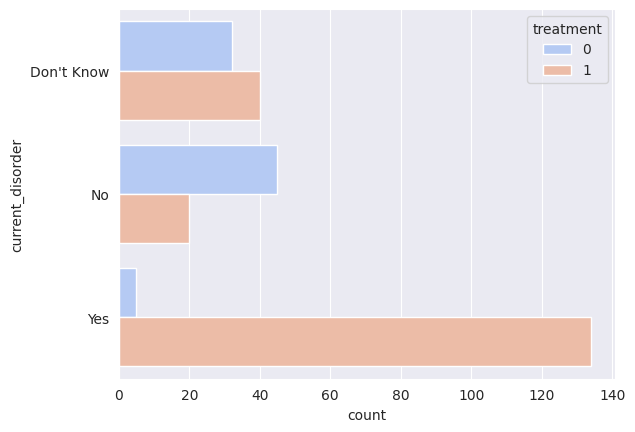

In [34]:
#current_disorder

f, ax = plt.subplots()
sns.set_style('darkgrid')
sns.countplot(y='current_disorder', hue='treatment',
              palette='coolwarm', data=df_all)

#If employees currently have a mental health disorder, they will seek mental health treatment more than not.

In [35]:
#past_disorder

print(df_all['past_disorder'].unique())
print(df_all['past_disorder'].value_counts())

['No' 'Possibly' 'Yes' "Don't Know"]
Yes           145
No             67
Possibly       50
Don't Know     14
Name: past_disorder, dtype: int64


In [36]:
#past_disorder: 'Possibly' can be combined with "Don't Know".
df_all.loc[df_all['past_disorder']=='Possibly' , 'past_disorder'] = "Don't Know"

<Axes: xlabel='count', ylabel='past_disorder'>

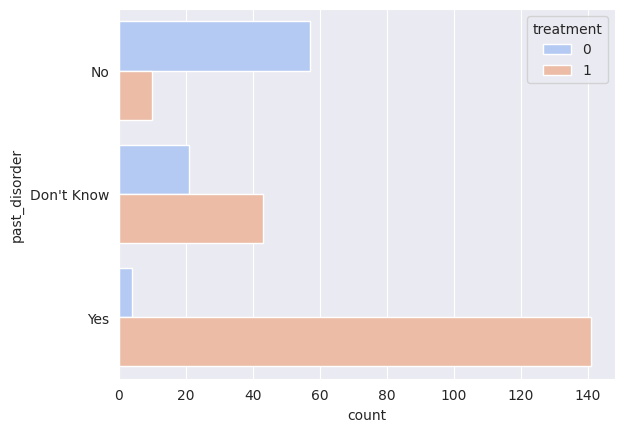

In [37]:
#past_disorder

f, ax = plt.subplots()
sns.set_style('darkgrid')
sns.countplot(y='past_disorder', hue='treatment',
              palette='coolwarm', data=df_all)

#If employees used to have a mental health disorder, they will seek mental health treatment more than not.

['No' 'Yes' "I don't know"]
Yes             151
No               63
I don't know     62
Name: fam_history, dtype: int64


<Axes: xlabel='count', ylabel='fam_history'>

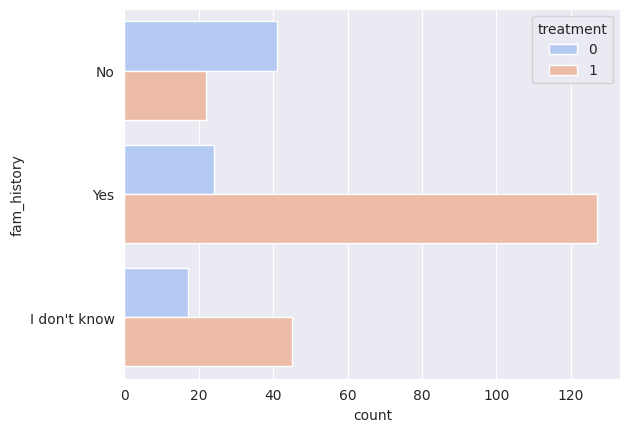

In [38]:
#fam_history

print(df_all['fam_history'].unique())
print(df_all['fam_history'].value_counts())

f, ax = plt.subplots()
sns.set_style('darkgrid')
sns.countplot(y='fam_history', hue='treatment',
              palette='coolwarm', data=df_all)

#If employees have a family history of mental health issues, it will motivate them more to seek mental health treatment.

['Not applicable to me' 'Often' 'Sometimes' 'Rarely' 'Never']
Often                   134
Not applicable to me     71
Sometimes                57
Rarely                   12
Never                     2
Name: work_interfere_not_treated, dtype: int64


<Axes: xlabel='count', ylabel='work_interfere_not_treated'>

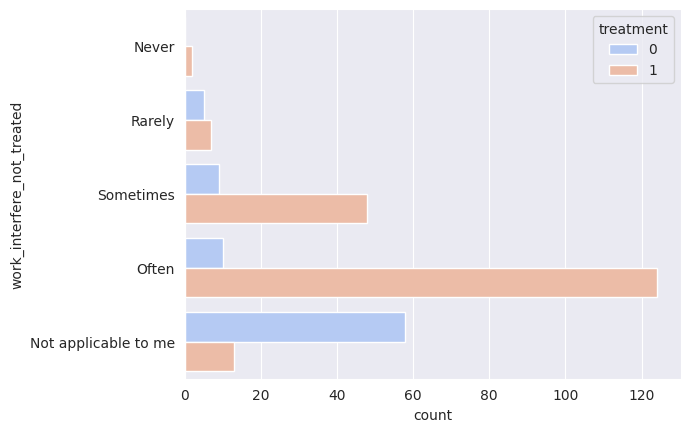

In [39]:
#work_interfere_not_treated

print(df_all['work_interfere_not_treated'].unique())
print(df_all['work_interfere_not_treated'].value_counts())

f, ax = plt.subplots()
sns.set_style('darkgrid')
sns.countplot(y='work_interfere_not_treated', hue='treatment',order=['Never', 'Rarely', 'Sometimes', 'Often', 'Not applicable to me'],
              palette='coolwarm', data=df_all)

#If employees feel not getting treatment will interfere with their work, it will motivate them more to seek mental health treatment.

['No' 'Yes, I observed' 'Maybe/Not sure' 'Yes, I experienced']
No                    118
Maybe/Not sure         67
Yes, I observed        49
Yes, I experienced     42
Name: bad_response_work, dtype: int64


<Axes: xlabel='count', ylabel='bad_response_work'>

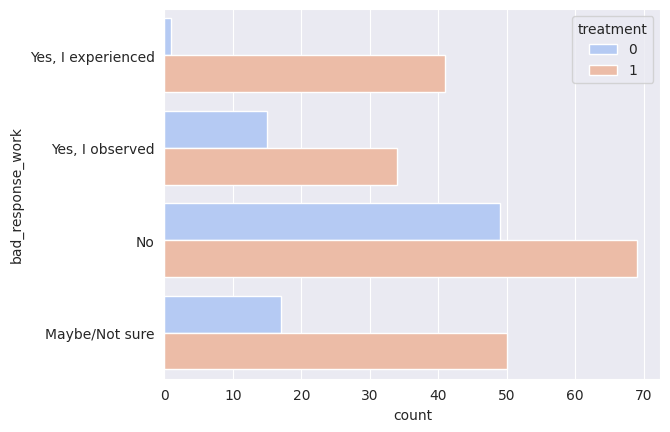

In [40]:
#bad_response_work

print(df_all['bad_response_work'].unique())
print(df_all['bad_response_work'].value_counts())

f, ax = plt.subplots()
sns.set_style('darkgrid')
sns.countplot(y='bad_response_work', hue='treatment', order=['Yes, I experienced', 'Yes, I observed', 'No', 'Maybe/Not sure'],
              palette='coolwarm', data=df_all)

#If employees experienced an badly handled response to a mental health issue in workplace, it will motivate them to seek mental health treatment more than not.

In [41]:
#age
df_all['age'].describe()

count    276.000000
mean      35.521739
std        9.023781
min        0.000000
25%       29.000000
50%       34.000000
75%       41.000000
max       63.000000
Name: age, dtype: float64

In [42]:
#Check for unreasonable values
df_all['age'].value_counts().sort_index()

0      1
19     1
20     1
21     1
22     6
23     4
24     7
25     5
26    13
27    16
28    11
29     7
30    21
31     9
32    15
33     9
34    13
35     9
36    11
37    14
38    10
39    11
40     9
41     5
42    13
43     2
44     5
45     8
46     4
47     6
48     3
49     2
50     3
51     5
52     1
53     6
54     2
55     2
58     1
59     1
60     1
62     1
63     1
Name: age, dtype: int64

In [43]:
#Convert age 0 to the mean
df_all.loc[df_all['age']==0 , 'age'] = 36

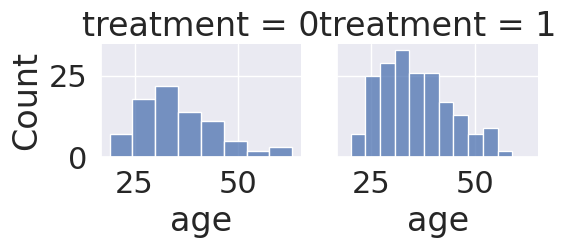

In [44]:
#Plot the age distribution for different treatment group
sns.set_style('darkgrid')
sns.set(font_scale = 2)
graph = sns.FacetGrid(df_all, col='treatment')
graph = graph.map(sns.histplot, "age")

In [45]:
#Set up additional feature for age range
df_all['age_range'] = pd.cut(df_all['age'], [0,25,35,45,65],
                           labels=["0-25", "26-35","36-45", "46-65"], include_lowest=True)

<Axes: title={'center': 'Distribution of different age groups'}, xlabel='Age groups', ylabel='Number of individuals'>

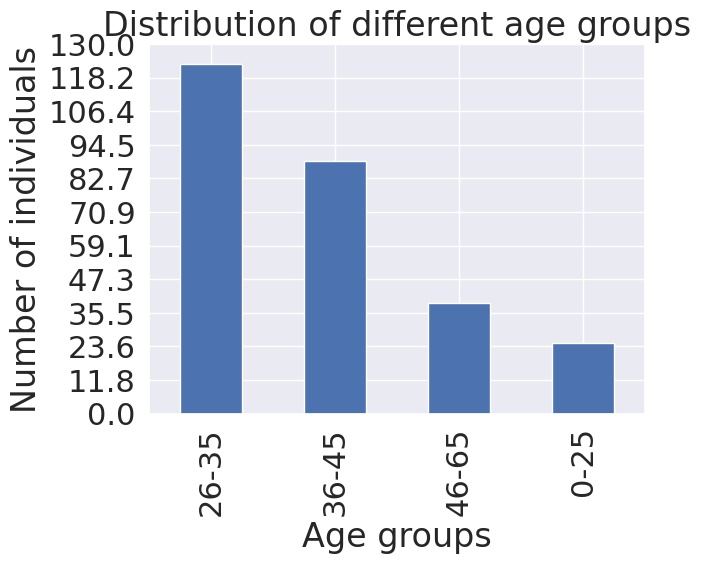

In [46]:
#Check distribution of age agroups
df_all['age_range'].value_counts().plot(kind='bar',xlabel='Age groups',ylabel='Number of individuals',
                                title='Distribution of different age groups', yticks=np.linspace(0,130,12))

<Axes: xlabel='count', ylabel='age_range'>

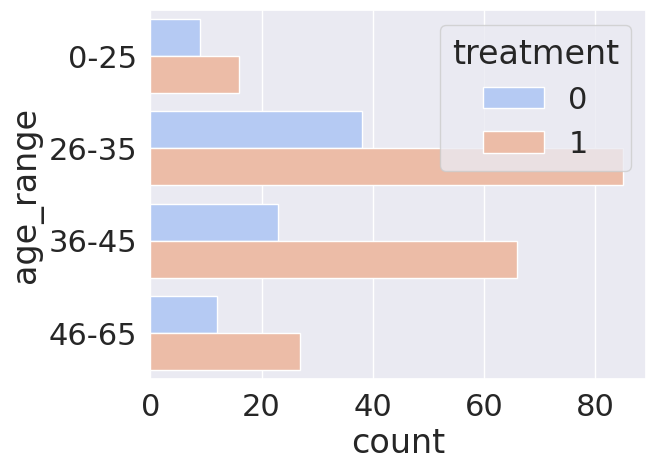

In [47]:
#Plot the distribution of data within different age groups for different treatment group
f, ax = plt.subplots()
sns.set_style('darkgrid')
sns.countplot(y='age_range', hue='treatment',
              palette='coolwarm', data=df_all)

#Employees in 26-45 seem to seek mental health treatment more than not.

In [48]:
#Drop age and keep age_range
df_all.drop(columns=['age'],inplace=True)

In [49]:
#gender

df_all['gender'] = df_all['gender'].str.lower().str.strip()
df_all['gender'].value_counts()

male                                   143
female                                  78
m                                       15
f                                       12
woman                                    5
female (cis)                             2
cis male                                 2
make                                     1
cis-het male                             1
male/he/him                              1
afab non-binary                          1
cisgender male                           1
mostly male                              1
non-binary and gender fluid              1
trans non-binary/genderfluid             1
agender trans woman                      1
none                                     1
trans man                                1
cis woman                                1
questioning                              1
man                                      1
agender                                  1
nonbinary                                1
cishet male

In [50]:
#Split gender in 3 categories: male, female and other

#Create 3 new categories
Male = ['male','m','man','cis male','make','cis-het male','male/he/him','cisgender male','mostly male','cishet male',"let's keep it simple and say \"male\""]

Female = ['female','f','woman','female (cis)','cis woman']

Other = ['afab non-binary','non-binary and gender fluid','trans non-binary/genderfluid','agender trans woman','none','trans man','questioning','agender','nonbinary','non-binary/agender']


In [51]:
#Transform gender into 3 new categories
df_all['gender'] = df_all['gender'].replace(Male,'male')
df_all['gender'] = df_all['gender'].replace(Female,'female')
df_all['gender'] = df_all['gender'].replace(Other,'other')

df_all['gender'].value_counts()

male      168
female     98
other      10
Name: gender, dtype: int64

In [52]:
#Convert all of these columns into the Category type for feature reduction
column_names = list(df_all.columns)
for col in column_names:
    df_all[col] = df_all[col].astype('category')

df_all.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 0 to 124
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   year                        276 non-null    category
 1   no_employees                276 non-null    category
 2   tech_company                276 non-null    category
 3   work_benefits               276 non-null    category
 4   work_benefits_awareness     276 non-null    category
 5   work_communication          276 non-null    category
 6   work_resources              276 non-null    category
 7   anonymity                   276 non-null    category
 8   leave                       276 non-null    category
 9   supervisor_comfort          276 non-null    category
 10  coworker_comfort            276 non-null    category
 11  current_disorder            276 non-null    category
 12  past_disorder               276 non-null    category
 13  treatment           

4) Feature Reduction

In [53]:
#Convert categorical variables into numerical using one-hot coding

df_all2 = pd.get_dummies(df_all, drop_first=True)

In [54]:
#Check shape of new dataframe
df_all2.columns

Index(['year_2020', 'year_2021', 'no_employees_100-500', 'no_employees_26-100',
       'no_employees_500-1000', 'no_employees_6-25',
       'no_employees_More than 1000', 'tech_company_1.0', 'work_benefits_No',
       'work_benefits_Yes', 'work_benefits_awareness_Yes',
       'work_communication_No', 'work_communication_Yes', 'work_resources_No',
       'work_resources_Yes', 'anonymity_No', 'anonymity_Yes',
       'leave_I don't know', 'leave_Neither easy nor difficult',
       'leave_Somewhat difficult', 'leave_Somewhat easy', 'leave_Very easy',
       'supervisor_comfort_No', 'supervisor_comfort_Yes',
       'coworker_comfort_No', 'coworker_comfort_Yes', 'current_disorder_No',
       'current_disorder_Yes', 'past_disorder_No', 'past_disorder_Yes',
       'treatment_1', 'fam_history_No', 'fam_history_Yes',
       'work_interfere_not_treated_Not applicable to me',
       'work_interfere_not_treated_Often', 'work_interfere_not_treated_Rarely',
       'work_interfere_not_treated_Sometime

In [55]:
#Create new dataframe containing only input features
X2 = df_all2.drop('treatment_1', axis=1)
y2 = df_all2['treatment_1']

In [56]:
#calculate chi2 score
from sklearn.feature_selection import SelectKBest, chi2

#Categorical feature selection
sf = SelectKBest(chi2, k='all')
sf_fit2 = sf.fit(X2, y2) #use inputs that have been treated with one-hot encoding

#Print feature scores
for i in range(len(sf_fit2.scores_)):
    print(' %s: %f' % (X2.columns[i], sf_fit2.scores_[i]))

 year_2020: 2.458781
 year_2021: 1.587272
 no_employees_100-500: 2.045803
 no_employees_26-100: 1.659805
 no_employees_500-1000: 0.390334
 no_employees_6-25: 0.299569
 no_employees_More than 1000: 0.036012
 tech_company_1.0: 0.002892
 work_benefits_No: 0.066533
 work_benefits_Yes: 7.894227
 work_benefits_awareness_Yes: 12.133201
 work_communication_No: 1.531046
 work_communication_Yes: 0.927661
 work_resources_No: 0.039786
 work_resources_Yes: 0.617237
 anonymity_No: 6.055268
 anonymity_Yes: 0.422513
 leave_I don't know: 0.158599
 leave_Neither easy nor difficult: 0.316310
 leave_Somewhat difficult: 0.555640
 leave_Somewhat easy: 1.282499
 leave_Very easy: 8.260900
 supervisor_comfort_No: 0.013448
 supervisor_comfort_Yes: 0.000002
 coworker_comfort_No: 1.632272
 coworker_comfort_Yes: 0.105034
 current_disorder_No: 48.614243
 current_disorder_Yes: 45.387020
 past_disorder_No: 98.342188
 past_disorder_Yes: 50.435606
 fam_history_No: 37.739323
 fam_history_Yes: 13.802279
 work_interfere_n

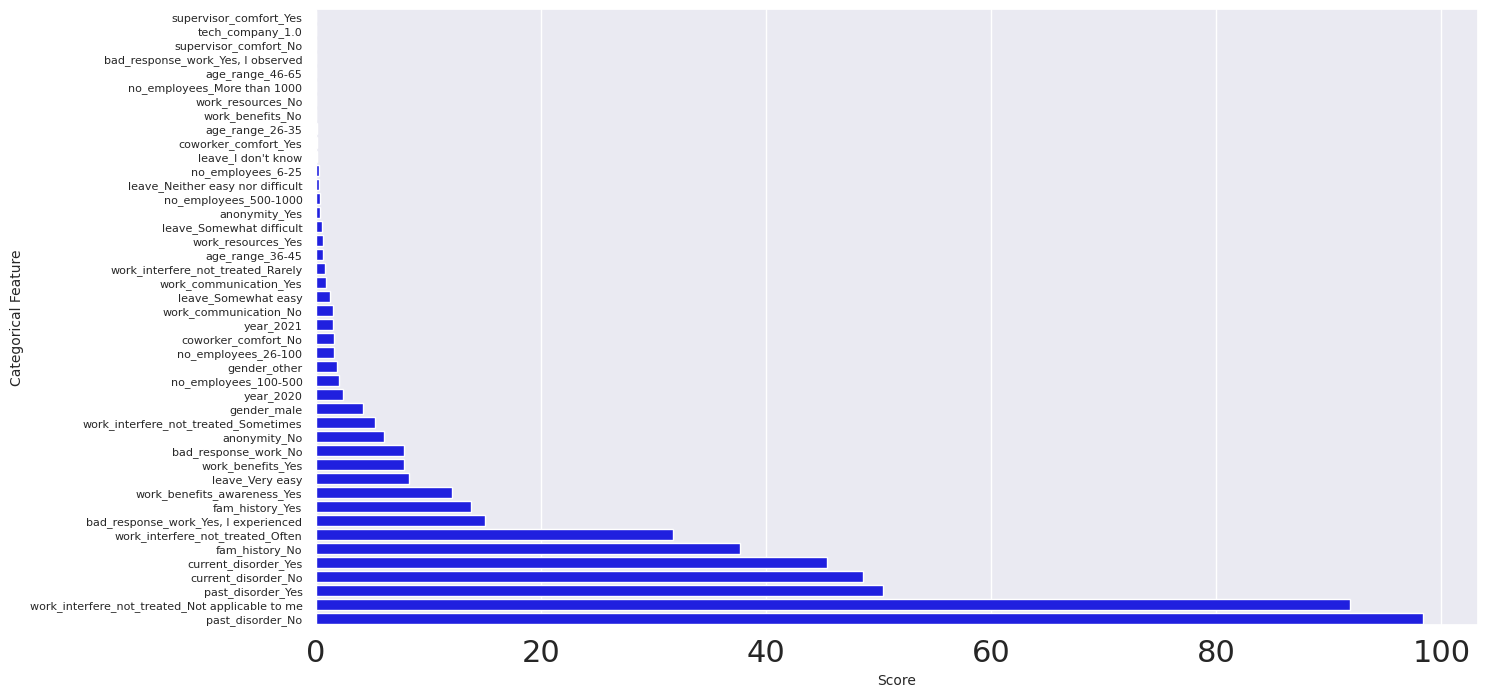

In [57]:
#Plot chi2 scores
ds2 = pd.DataFrame()
ds2['feature'] = X2.columns[range(len(sf_fit2.scores_))]
ds2['scores'] = sf_fit2.scores_
ds2 = ds2.sort_values(by='scores', ascending=True)

#Create barplot
plt.figure(figsize=(15,8))
sns.barplot(x=ds2['scores'], y=ds2['feature'], color='blue')
#Set style attributes
sns.set_style('darkgrid')
plt.yticks(fontsize=8)
plt.ylabel('Categorical Feature', fontsize=10)
plt.xlabel('Score', fontsize=10)
plt.show()

In [58]:
#Scale the features
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

df_scaled = std_scaler.fit_transform(df_all2.to_numpy()) #use inputs that have been treated with one-hot encoding
df_scaled = pd.DataFrame(df_all2, columns=['year_2020', 'year_2021', 'no_employees_100-500', 'no_employees_26-100',
       'no_employees_500-1000', 'no_employees_6-25',
       'no_employees_More than 1000', 'tech_company_1.0', 'work_benefits_No',
       'work_benefits_Yes', 'work_benefits_awareness_Yes',
       'work_communication_No', 'work_communication_Yes', 'work_resources_No',
       'work_resources_Yes', 'anonymity_No', 'anonymity_Yes',
       'leave_I don\'t know', 'leave_Neither easy nor difficult',
       'leave_Somewhat difficult', 'leave_Somewhat easy', 'leave_Very easy',
       'supervisor_comfort_No', 'supervisor_comfort_Yes',
       'coworker_comfort_No', 'coworker_comfort_Yes', 'current_disorder_No',
       'current_disorder_Yes', 'past_disorder_No', 'past_disorder_Yes',
       'treatment_1', 'fam_history_No', 'fam_history_Yes',
       'work_interfere_not_treated_Not applicable to me',
       'work_interfere_not_treated_Often', 'work_interfere_not_treated_Rarely',
       'work_interfere_not_treated_Sometimes', 'bad_response_work_No',
       'bad_response_work_Yes, I experienced',
       'bad_response_work_Yes, I observed', 'gender_male', 'gender_other',
       'age_range_26-35', 'age_range_36-45', 'age_range_46-65'])

print("Scaled Dataset Using StandardScaler")
df_scaled.head().T

Scaled Dataset Using StandardScaler


,0,1,2,3,4
year_2020,0,0,0,0,0
year_2021,0,0,0,0,0
no_employees_100-500,0,0,0,1,0
no_employees_26-100,1,1,1,0,1
no_employees_500-1000,0,0,0,0,0
no_employees_6-25,0,0,0,0,0
no_employees_More than 1000,0,0,0,0,0
tech_company_1.0,1,1,1,1,1
work_benefits_No,0,0,0,0,0
work_benefits_Yes,0,1,0,0,0


In [59]:
#Check the info of data frame after scaling
df_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
year_2020,276.0,0.202899,0.402888,0.0,0.0,0.0,0.0,1.0
year_2021,276.0,0.155797,0.363322,0.0,0.0,0.0,0.0,1.0
no_employees_100-500,276.0,0.206522,0.405545,0.0,0.0,0.0,0.0,1.0
no_employees_26-100,276.0,0.170290,0.376570,0.0,0.0,0.0,0.0,1.0
no_employees_500-1000,276.0,0.090580,0.287532,0.0,0.0,0.0,0.0,1.0
no_employees_6-25,276.0,0.094203,0.292641,0.0,0.0,0.0,0.0,1.0
no_employees_More than 1000,276.0,0.427536,0.495620,0.0,0.0,0.0,1.0,1.0
tech_company_1.0,276.0,0.666667,0.472261,0.0,0.0,1.0,1.0,1.0
work_benefits_No,276.0,0.054348,0.227115,0.0,0.0,0.0,0.0,1.0
work_benefits_Yes,276.0,0.677536,0.468268,0.0,0.0,1.0,1.0,1.0


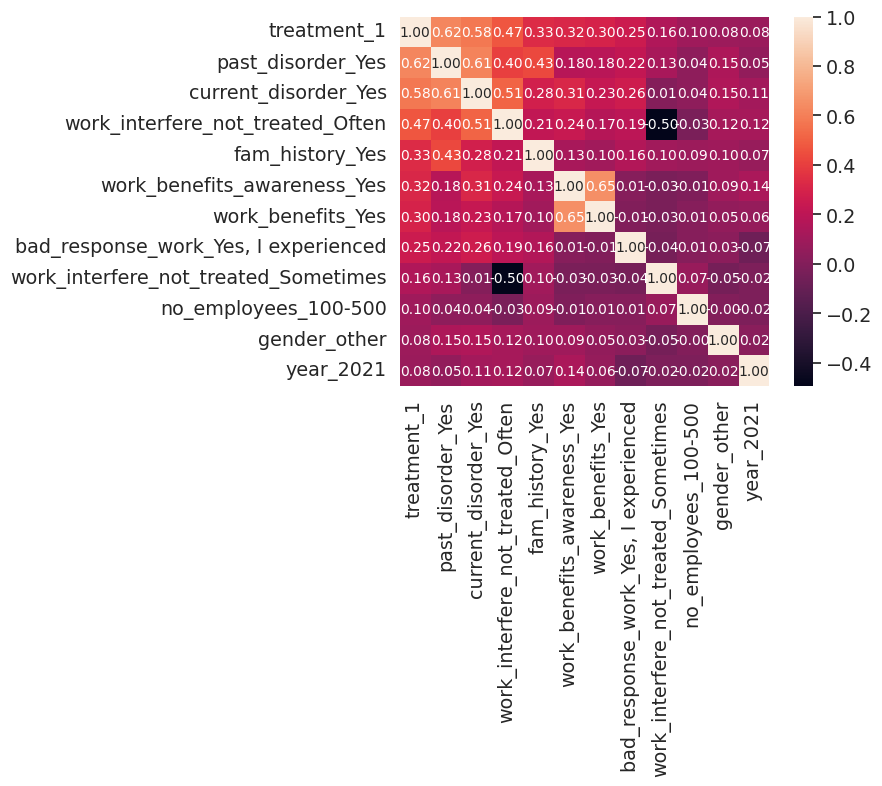

In [60]:
#Correlation matrix
corrmat = df_scaled.corr() #use inputs that have been treated with one-hot encoding and scaled

#treatment correlation matrix
k = 12 #number of variables for heatmap
cols = corrmat.nlargest(k, 'treatment_1')['treatment_1'].index
cm = np.corrcoef(df_scaled[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels=cols.values, xticklabels=cols.values)
# plt.savefig('cov.png')
plt.show()

In [61]:
#Select best features using LabelEncoder an OrdinalEncoder on categorical variables

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

#seperate target variable from the rest of features
X = df_all.drop('treatment', axis=1) #use inputs that have NOT been treated with one-hot encoding
y = df_all['treatment']

In [62]:
#Prepare input features
#Ordinal Encoder is used to encode the input
oe = OrdinalEncoder()
oe.fit(X)
X_enc = oe.transform(X)

#Prepare target variable
#Label encoder is used to encode the output, or target variable,
#in this case if the employee has sought treatment or not
le = LabelEncoder()
le.fit(y)
y_enc = le.transform(y)

In [63]:
#Check shape of the encoded features
print(X_enc.shape)
X_enc

(276, 18)


array([[0., 2., 1., ..., 1., 1., 0.],
       [0., 2., 1., ..., 3., 1., 3.],
       [0., 2., 1., ..., 0., 1., 1.],
       ...,
       [2., 1., 0., ..., 3., 0., 1.],
       [2., 5., 0., ..., 3., 1., 1.],
       [2., 4., 1., ..., 0., 1., 3.]])

In [64]:
#Check shape of the encoded target
print(y_enc.shape)
y_enc

(276,)


array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0])

In [65]:
#Feature selection based on Chi2 scores
sf = SelectKBest(chi2, k='all')
sf_fit = sf.fit(X_enc, y_enc) #use inputs that have NOT been treated with one-hot encoding nor scaled

#Print feature scores
for i in range(len(sf_fit.scores_)):
    print(' %s: %f' % (X.columns[i], sf_fit.scores_[i]))

 year: 0.161499
 no_employees: 0.390948
 tech_company: 0.002892
 work_benefits: 15.576894
 work_benefits_awareness: 12.133201
 work_communication: 0.110919
 work_resources: 0.719885
 anonymity: 0.290158
 leave: 4.683540
 supervisor_comfort: 0.004017
 coworker_comfort: 0.138028
 current_disorder: 30.715777
 past_disorder: 22.619480
 fam_history: 4.958986
 work_interfere_not_treated: 19.973988
 bad_response_work: 0.811054
 gender: 1.689737
 age_range: 0.200967


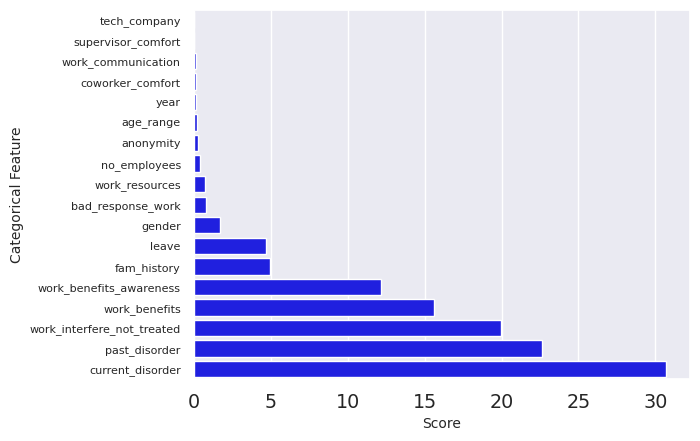

In [66]:
#Plot chi2 scores
ds = pd.DataFrame()
ds['feature'] = X.columns[range(len(sf_fit.scores_))]
ds['scores'] = sf_fit.scores_
ds = ds.sort_values(by='scores', ascending=True)

#Create barplot
sns.barplot(x=ds['scores'], y=ds['feature'], color='blue')
#Set style
sns.set_style('darkgrid')
plt.yticks(fontsize=8)
plt.ylabel('Categorical Feature', fontsize=10)
plt.xlabel('Score', fontsize=10)
plt.show()

The categorical features with the highest values in the correlation matrix and for the chi2 stat indicate higher relevance and importance in predicting whether employees will seek treatment. These should be included in our model.

In [67]:
#Drop features with low chi2 scores as they are relatively unimportant
df_all.drop(columns=['tech_company','supervisor_comfort', 'work_communication', 'coworker_comfort', 'year', 'age_range', 'anonymity', 'no_employees', 'work_resources', 'bad_response_work', 'gender'],
          inplace=True)


5) Clustering using K-modes on categorical data

In [68]:
#Import kmode libraries
!pip install kmodes #https://pypi.org/project/kmodes/
from kmodes.kmodes import KModes


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1032.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 1032.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 1032.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 1032.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 1032.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 54, cost: 757.0
Run 1, iteration: 2/100, moves: 35, cost: 722.0
Run 1, iteration: 3/100, moves: 2, cost: 722.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 53,

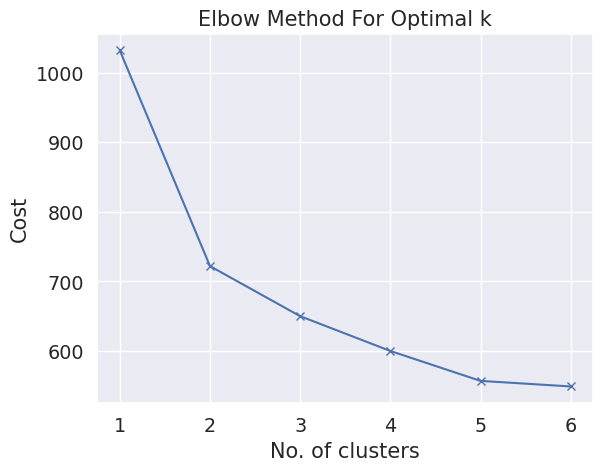

In [69]:
#k-modes clustering using categorical data

#Elbow curve to find optimal K
cost = []
K = range(1,7)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(df_all) #use df_all before one-hot encoding
    cost.append(kmode.cost_)

plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

Elbow is formed at K=2 clusters (ie., optimal number). We will create a model with 2 clusters.

In [70]:
#Build kmode model with 2 clusters
kmode = KModes(n_clusters=2, init = "random", n_init = 5, verbose=1)
kmode_cluster = kmode.fit_predict(df_all) #use df_all before one-hot encoding

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 25, cost: 728.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 66, cost: 722.0
Run 2, iteration: 2/100, moves: 7, cost: 722.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 15, cost: 722.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 31, cost: 728.0
Run 4, iteration: 2/100, moves: 3, cost: 728.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 62, cost: 961.0
Run 5, iteration: 2/100, moves: 3, cost: 961.0
Best run was number 2


In [71]:
#Insert new column "kmode_clusters" into dataset to show which cluster each entry belongs.
df_kmode = df_all.copy()
df_kmode.insert(0, "KMode_Cluster", kmode_cluster, True)
df_kmode.head()

,KMode_Cluster,work_benefits,work_benefits_awareness,leave,current_disorder,past_disorder,treatment,fam_history,work_interfere_not_treated
0,1,I don't know,No,Very easy,Don't Know,No,0,No,Not applicable to me
1,0,Yes,No,I don't know,Don't Know,Don't Know,0,Yes,Often
2,1,I don't know,No,Somewhat difficult,No,No,0,I don't know,Not applicable to me
3,1,I don't know,No,Very easy,No,No,0,Yes,Not applicable to me
4,1,I don't know,No,I don't know,No,No,0,No,Not applicable to me


6) Clustering using K-means on numerical data

In [72]:
#Load clustering library
!pip install tqdm
from tqdm import tqdm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

100%|██████████| 8/8 [00:03<00:00,  2.21it/s]


silhouette scores:
2 : 0.121
3 : 0.094
4 : 0.085
5 : 0.068
6 : 0.068
7 : 0.065
8 : 0.061
9 : 0.059


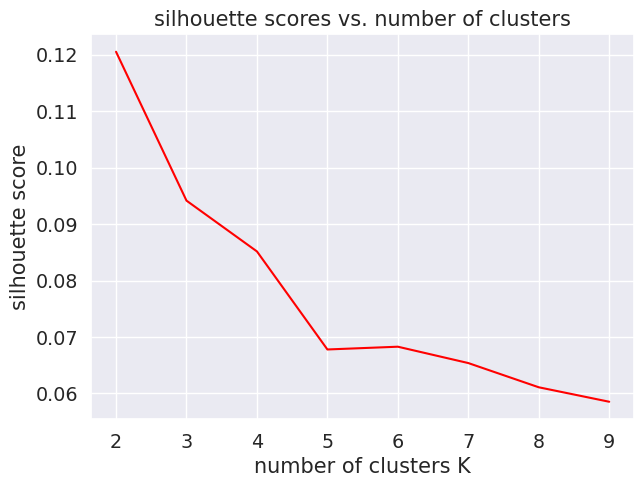

In [73]:
#Find maximum silhouette score for up to 10 clusters
sil_scores = [silhouette_score(
                                df_scaled, #use inputs that have been treated with one-hot encoding and scaled
                                KMeans(n_clusters=k, random_state=42). \
                                fit_predict(df_scaled)) \
                                for k in tqdm(range(2,10))]

dict_sil = dict(zip(range(2,10), sil_scores))
print("silhouette scores:")
_ = [print(k, ":", f'{v:,.3f}') for k,v in dict_sil.items()]

plt.figure(figsize=[7,5])
plt.plot(range(2,10), sil_scores, color="red")
plt.title("silhouette scores vs. number of clusters")
plt.xticks(np.arange(2,10,1))
plt.xlabel("number of clusters K")
plt.ylabel("silhouette score")
plt.show()

Maximum silhouette score for 2 clusters:  0.121



In [74]:
#Build kmean model with 2 clusters
kmean = KMeans(n_clusters=2, random_state=45)
kmean_cluster = kmean.fit_predict(df_scaled) #use inputs that have been treated with one-hot encoding and scaled

#Insert new column "kmean_clusters" into dataset to show which cluster each entry belongs.
df_kmean = df_kmode.copy()
df_kmean.insert(0, "KMean_Cluster", kmean_cluster, True)
df_kmean.head()

,KMean_Cluster,KMode_Cluster,work_benefits,work_benefits_awareness,leave,current_disorder,past_disorder,treatment,fam_history,work_interfere_not_treated
0,0,1,I don't know,No,Very easy,Don't Know,No,0,No,Not applicable to me
1,1,0,Yes,No,I don't know,Don't Know,Don't Know,0,Yes,Often
2,0,1,I don't know,No,Somewhat difficult,No,No,0,I don't know,Not applicable to me
3,0,1,I don't know,No,Very easy,No,No,0,Yes,Not applicable to me
4,0,1,I don't know,No,I don't know,No,No,0,No,Not applicable to me


7) PCA using numerical data

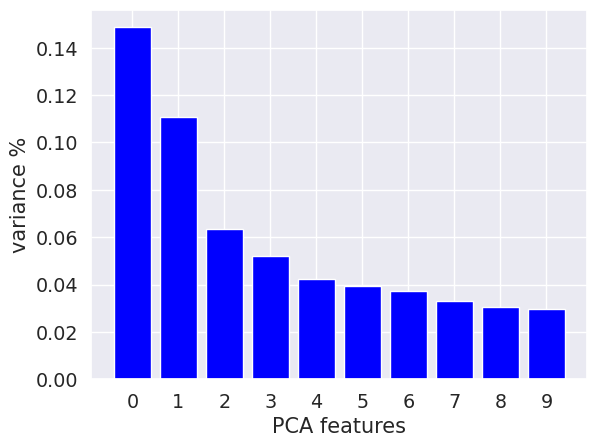

In [75]:
#Run PCA
pca = PCA(n_components=10)
result_pca = pca.fit_transform(df_scaled) #use inputs that have been treated with one-hot encoding and scaled

#Plot % of variance explained by components
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='blue')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

df_pca = pd.DataFrame(result_pca)

Variance drop-off occurs after the second component; first 2 explain most of variance in data.

In [76]:
#Set the column names
df_pca.columns = ['pca_0', 'pca_1', 'pca_2', 'pca_3', 'pca_4',
                    'pca_5','pca_6','pca_7','pca_8','pca_9']
df_pca.insert(0, "PCA_cluster", kmean_cluster)

In [77]:
#Check df_pca head
df_pca.head()

,PCA_cluster,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9
0,0,1.593608,1.321706,-1.159987,-0.045021,-0.215510,0.287984,-0.433098,-0.482347,-0.355595,0.524829
1,1,0.124981,-0.144287,0.090143,-0.283534,0.047817,0.031087,-0.220422,0.157222,-0.452214,-0.549897
2,0,2.055679,-0.577099,0.174237,0.498637,-0.006300,0.473508,-0.113919,0.073671,0.045916,-0.289341
3,0,1.293147,1.260835,-1.045356,-0.404029,0.259964,-0.178912,0.257187,-0.941326,-0.018160,0.551707
4,0,2.271609,0.072937,0.637907,-0.240549,0.127122,0.568611,-0.150245,-0.447860,-0.221203,0.627160


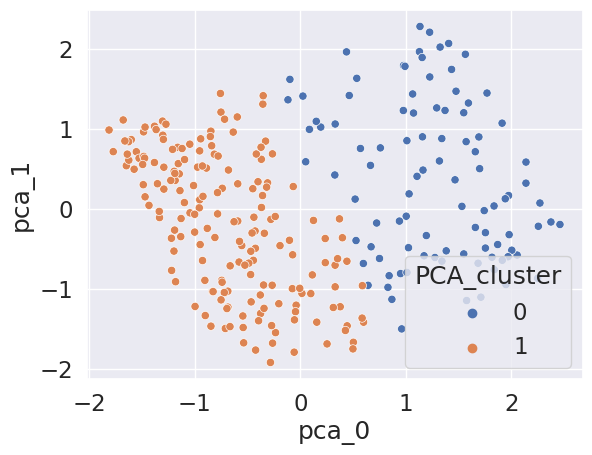

In [78]:
#Plot the scatter plot of pca_0 vs pca_1 to see if there are clear clusters
fig = plt.figure()
sns.set(font_scale = 1.5)
sns.scatterplot(data=df_pca, x="pca_0", y="pca_1", hue="PCA_cluster")
plt.show()

There are 2 distinct clusters per the principal component analysis.

8) Accuracy Scores and Confusion Matrix for K-means Clustering Results

In [79]:
#import packages for accuracy scores
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score
from sklearn.metrics import confusion_matrix

In [80]:
#Prepare confusion matrix
y_test = df_kmean['treatment']
predictions = kmean_cluster

confusion = confusion_matrix(y_test, predictions, labels=[1, 0])
print(confusion)

[[173  21]
 [  6  76]]


In [81]:
#Define function to plot confusion matrix
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    Given a scikit-learn confusion matrix (CM), make a nice plot.

    Arguments
    ---------
    cm:           Confusion matrix from sklearn.metrics.confusion_matrix

    target_names: Given classification classes, such as [0, 1, 2]
                  The class names, for example, ['high', 'medium', 'low']

    title:        The text to display at the top of the matrix

    cmap:         The gradient of the values displayed from matplotlib.pyplot.cm
                  See http://matplotlib.org/examples/color/colormaps_reference.html
                  `plt.get_cmap('jet')` or `plt.cm.Blues`

    normalize:    If `False`, plot the raw numbers
                  If `True`, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # Confusion matrix created by
                                                              # `sklearn.metrics.confusion_matrix`
                          normalize    = True,                # Show proportions
                          target_names = y_labels_vals,       # List of names of the classes
                          title        = best_estimator_name) # Title of graph

    Citation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

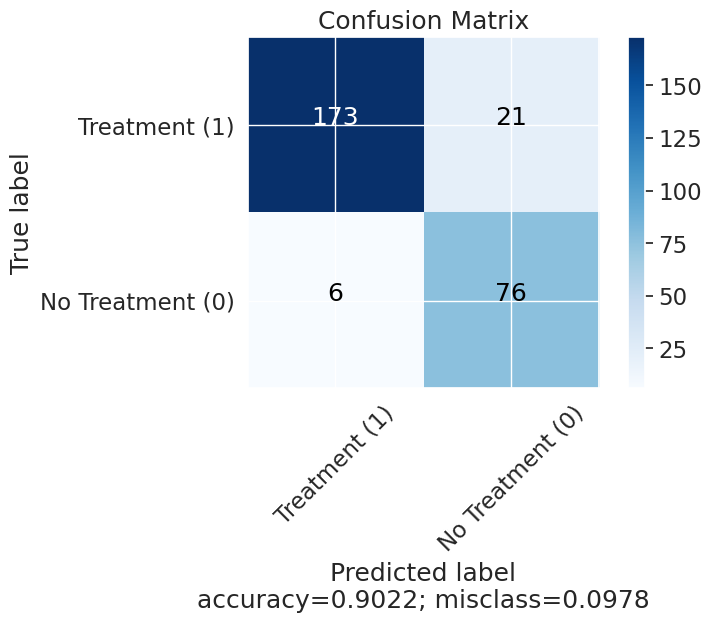

In [82]:
#Plot confusion matrix
plot_confusion_matrix(cm=confusion, target_names = ['Treatment (1)', 'No Treatment (0)'], title = 'Confusion Matrix',normalize=False)

In [83]:
#Calculate accuracy scores

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
fbeta_precision = fbeta_score(y_test, predictions, beta=0.5)
fbeta_recall = fbeta_score(y_test, predictions, beta=2)

print('Accuracy score: {:.4f}'.format(accuracy))
print('Precision score: {:.4f}'.format(precision))
print('Recall score: {:.4f}'.format(recall))
print('F1 score: {:.4f}'.format(f1))
print('Fbeta score favoring precision: {:.4f}'.format(fbeta_precision))
print('FBeta score favoring recall: {:.4f}'.format(fbeta_recall))

Accuracy score: 0.9022
Precision score: 0.9665
Recall score: 0.8918
F1 score: 0.9276
Fbeta score favoring precision: 0.9505
FBeta score favoring recall: 0.9058


In unsupervised learing, clustering is done without any labeleld data to compare our prediction to (i.e., labeled data isn't always available). However, in this case we do have labeled data for our target variable "treatment", therefore we can compare our predicted label to true lable to assess the accuracy of our clustering, similar to how we would evaluate the results of a classification model under supervised learning.

Interpretation:


*   Accuracy: The Kmean model correctly classified 90.22% of the employees to those that seek treatment or not.*italicized text*
*   Precision: 96.65% of the model's positive assignment are correct.
*   Recall: 89.18% of instances in the treatment class were correctly assigned.


9) Visual Exploration

In [84]:
#Classification report
report = classification_report(y_test, predictions, target_names=['No Treatment', 'Treatment'])
print(report)

              precision    recall  f1-score   support

No Treatment       0.78      0.93      0.85        82
   Treatment       0.97      0.89      0.93       194

    accuracy                           0.90       276
   macro avg       0.87      0.91      0.89       276
weighted avg       0.91      0.90      0.90       276



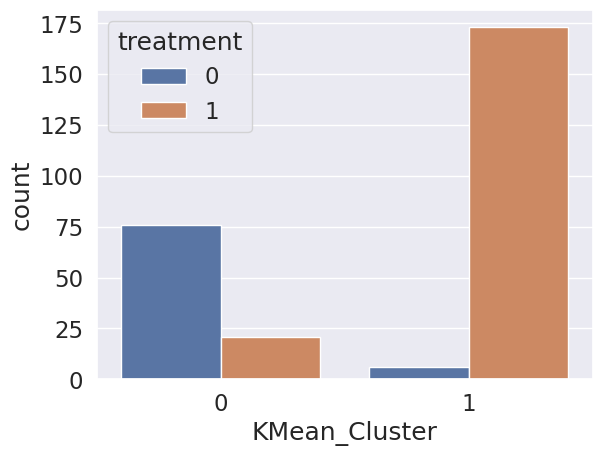

In [85]:
#Plot the treatment distribution for different kMean clusters
sns.set_style('darkgrid')
sns.countplot(x='KMean_Cluster', hue = 'treatment',  data= df_kmean)
plt.show()

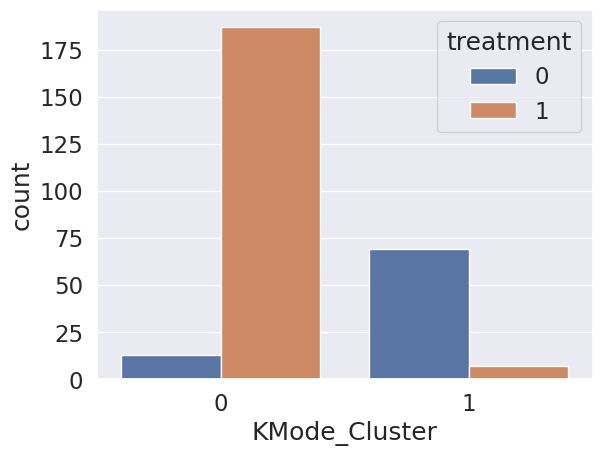

In [86]:
#Plot the treatment distribution for different kMode clusters
sns.set_style('darkgrid')
sns.countplot(x='KMode_Cluster', hue = 'treatment',  data= df_kmean)
plt.show()

The two plots above comfirm that there are two distinct clusters under Kmean and Kmode methods. One cluster consists of employees who sought treatment while the other is for employees who did not. These results corroborate with the assignment observed in our target variable "Treatment".

In [87]:
#Pull out columns with categorical datatype
lis = list(set(df_kmean.columns) - set(['KMean_Cluster', 'KMode_Cluster', 'treatment']))

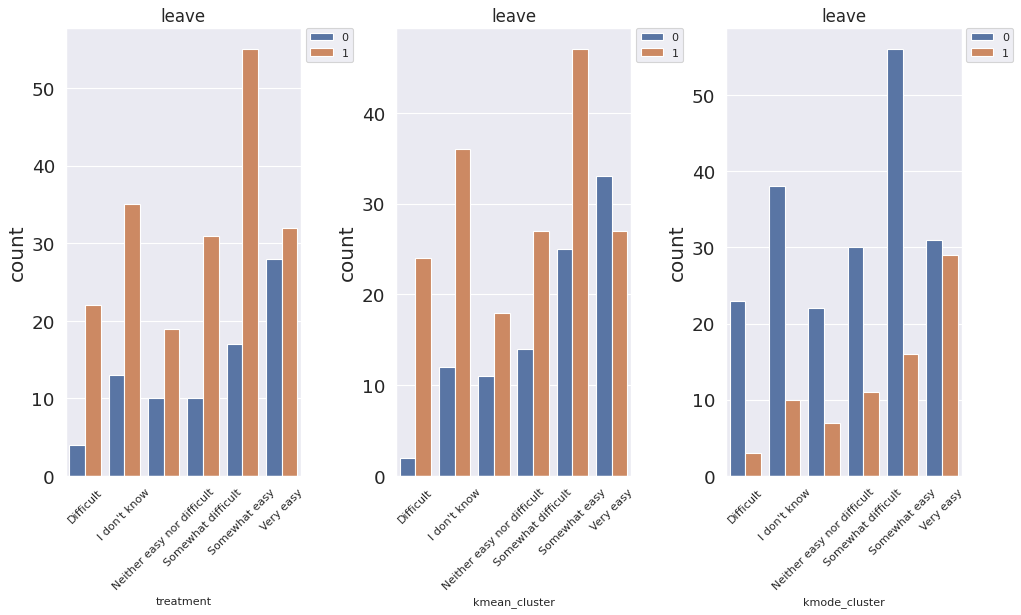

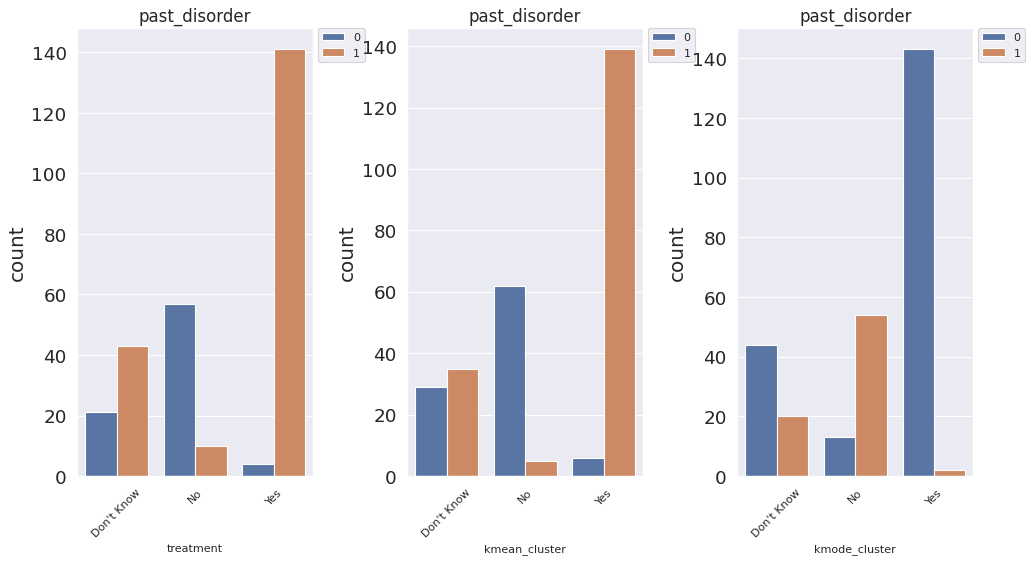

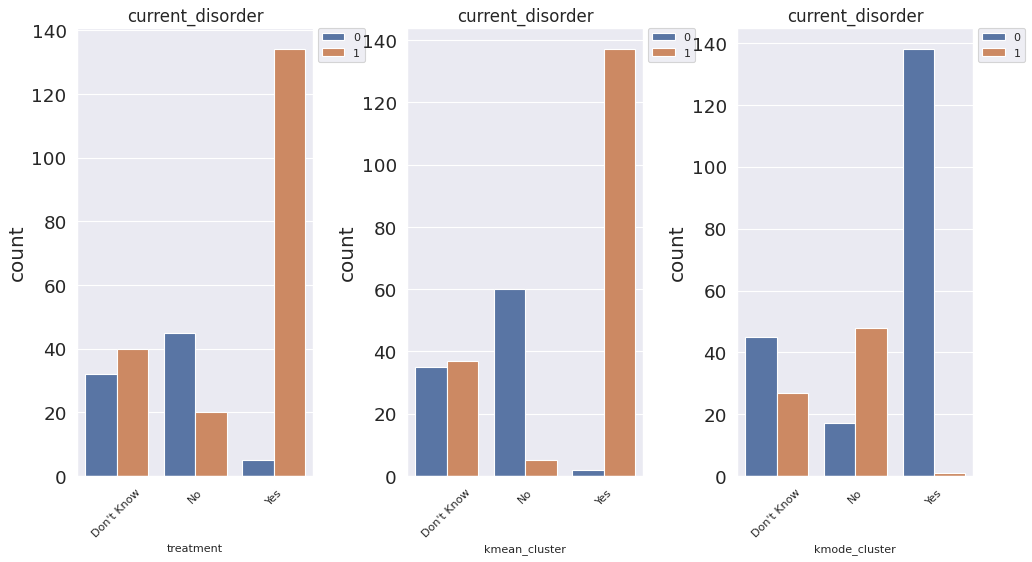

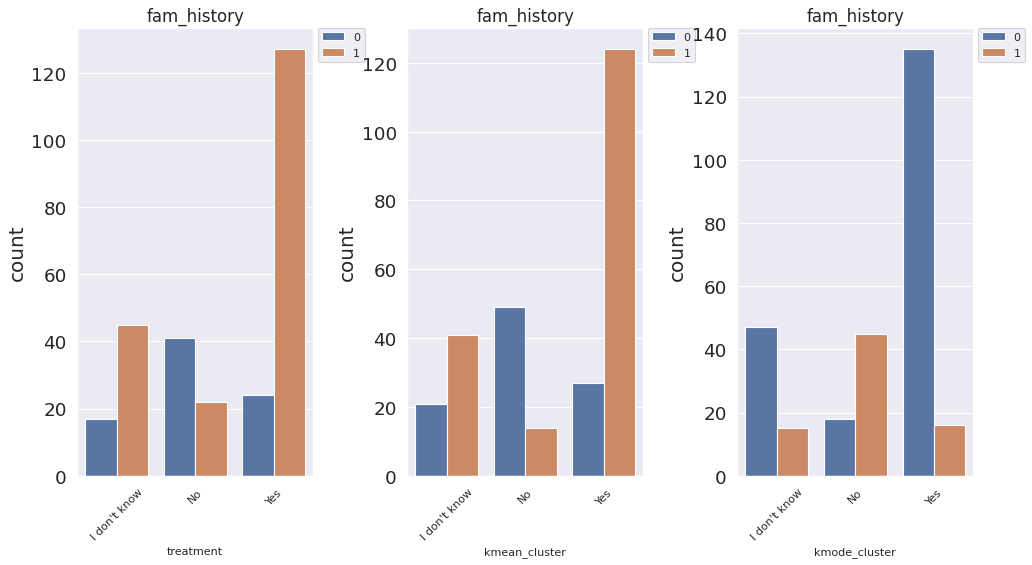

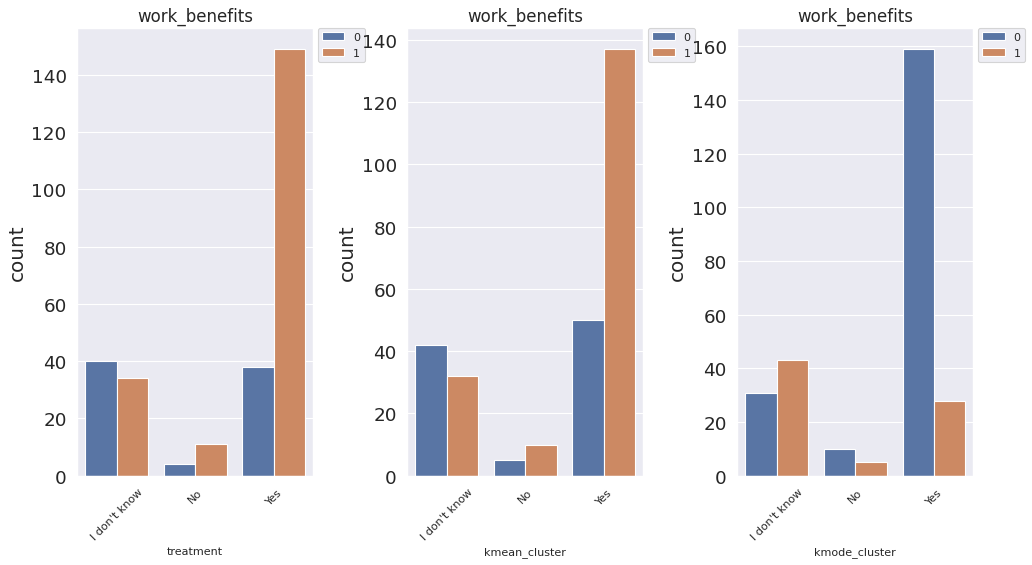

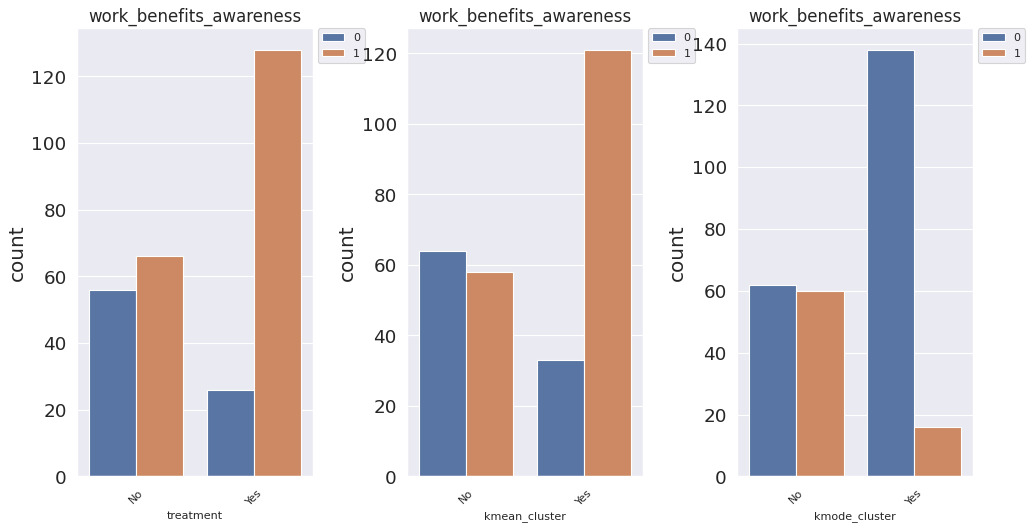

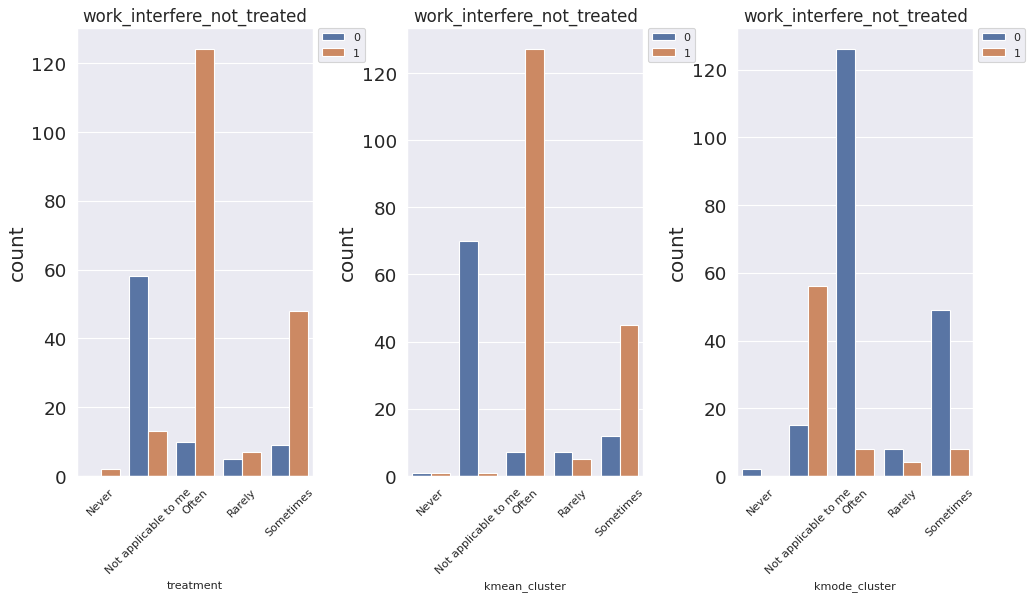

In [88]:
#Use plots to compare assignments of clusters and target variable (treatment)
for i, j in enumerate(lis):
    plt.figure(figsize=(8, 4), dpi=80)

    ax1 = plt.subplot2grid((1,3),(0,0))
    sns.set_style('darkgrid')
    sns.countplot(x=j, hue = 'treatment',  data= df_kmean)
    plt.title(j, fontsize=15)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize = 10)
    plt.xlabel('treatment', fontsize=10)
    plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=1.5,
                    top=1.5,
                    wspace=0.4,
                    hspace=0.4)
    plt.xticks(rotation = 45, fontsize=10)

    ax1 = plt.subplot2grid((1,3),(0,1))
    sns.set_style('darkgrid')
    sns.countplot(x=j, hue = 'KMean_Cluster',  data= df_kmean)
    plt.title(j, fontsize=15)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize = 10)
    plt.xlabel('kmean_cluster', fontsize=10)
    plt.xticks(rotation = 45, fontsize=10)

    ax1 = plt.subplot2grid((1,3),(0,2))
    sns.set_style('darkgrid')
    sns.countplot(x=j, hue = 'KMode_Cluster',  data= df_kmean)
    plt.title(j, fontsize=15)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize = 10)
    plt.xlabel('kmode_cluster', fontsize=10)
    plt.xticks(rotation = 45, fontsize=10)

    plt.show()

9) Clustering Insights and Summary

*   Cluster 1 consists mostly of employees who seek treatment for mental health issues.
*   Within cluster 1, employees’ workplace provides mental health benefits as part of healthcare coverage and they are also more aware of these benefits and the options available. Perhaps it is because availability of these benefits motivate them to seek treatment. The need for benefits to pay for treatment bill may also motivate them to find out more about the benefits offered, hence increasing overall awareness.

*   In addition, employees with a current disorder, past disorder or family history of disorder are more likely to seek treatment. If they feel their work is often interfered by their symptoms when NOT treated, they are also more motivated to seek treatment.

*   Last but not least, employees who feel it is "somewhat easy" to request a medical leave from work for mental health issues also tend to seek treatment more than not. Interestingly though, employees who feel it is "very easy" to request a leave do not seek treatment more than if it is just somewhat easy. Perhaps in this case they feel they can just take time off to rest and decompress without the need for treatment. In the "somewhat easy" scenario, perhaps when some employers introduce some eligibility criteria for medical leave such as a formal doctor’s diagnosis, it might motivate the employees to start on the process to seek treatment more than not.

10) Conclusion

In order to encourage employees to seek treatment, employers could do more to:

*   Offer more comprehensive health care benefits that cover mental health care.
*   Increase employees' awareness and knowledge of options for mental health care available under their employer-provided health coverage, i.e., through email communication, team forums or other wellness campaigns and publications.
*   Encourage employees to pay more attention to their emotions, stress level and overall sense of well-being.
*   Improve the ease to request medical leave to address mental health issues, while incorporating some eligibility criteria that motivate employees to start discussions with medical professionals and setting up treatment plans.
